# Assignment 6

### 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?

The biggest advantage of CNN is that it requires less parameters and thus save memory, as the dimmension of data is reduced by filtering and pooling.

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

1300 in total, 26 parameters in each filter.

#### 3. What are "local invariant" and "parameter sharing" ?

Local invariant means the features can be detected wherever they are located, because the filter always scan through the whole picture.
Parameter sharing scheme is used to control the number of parameters, based on the assumption that if one feature is useful to compute at some spatial position (x,y), then it should also be useful to compute at a different position (x2,y2). 

#### 4. Why we use batch normalization ?

As the network getting comlecated, the distributions of layers’ inputs change, which make it hard for the deep layers to learn. BN is to make normalization a part of the model architecture and perform the normalization for each training mini-batch, in order to avoid problems caused by internal covariate shift.
Batch Normalization allows us to use much higher learning rates and be less careful about initialization. It also acts as a regularizer, in some cases eliminating the need for Dropout.

#### 5. What problem does dropout try to solve ?

Overfitting.

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

No, a pooling layer passes the error to its former layer in backpropagation. Like in maxi pooling, the neuron with the maximum value receives the error while others don't, and in average pooling, each neuron get an average error.

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [2]:
# from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Load the dataset. 

In [5]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

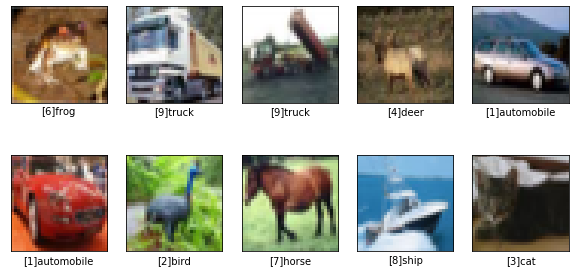

In [69]:
plt.figure(figsize=(10,5))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1], cmap = plt.cm.binary)
    plt.grid(False)
    plt.xlabel(str(y_train[i-1])+class_names[y_train[i-1][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [9]:
#Build a model with 3 convolutional layers and one dense layer using Sequential
seq_model = models.Sequential()
seq_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
seq_model.add(layers.MaxPooling2D((2, 2)))

seq_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
seq_model.add(layers.MaxPooling2D((2, 2)))

seq_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
seq_model.add(layers.MaxPooling2D((2, 2)))

seq_model.add(layers.Flatten())
seq_model.add(layers.Dropout(0.25))
seq_model.add(layers.Dense(64, activation='relu'))
seq_model.add(layers.Dense(10))

In [10]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [11]:
seq_model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [52]:
history1 = seq_model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.6284 - accuracy: 0.3998 - val_loss: 1.3035 - val_accuracy: 0.5279
Epoch 2/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.2796 - accuracy: 0.5392 - val_loss: 1.1532 - val_accuracy: 0.5849
Epoch 3/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.1282 - accuracy: 0.6008 - val_loss: 1.0820 - val_accuracy: 0.6211
Epoch 4/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.0352 - accuracy: 0.6328 - val_loss: 0.9793 - val_accuracy: 0.6616
Epoch 5/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.9665 - accuracy: 0.6611 - val_loss: 0.8983 - val_accuracy: 0.6863
Epoch 6/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.9160 - accuracy: 0.6764 - val_loss: 0.9110 - val_accuracy: 0.6802
Epoch 7/10
50000/50000 [==============================] 

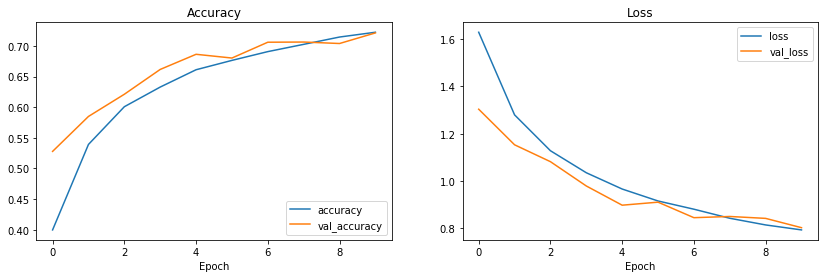

In [71]:
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(loc='upper right')

In [55]:
# Make predictions on test set
prediction = seq_model.predict_classes(x_test)
y_pred = prediction[:10]

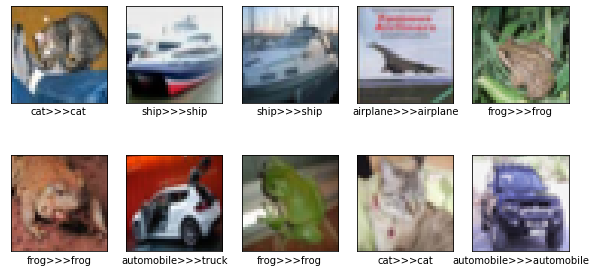

In [70]:
# real label >>> predicted label
plt.figure(figsize=(10,5))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_test[i-1], cmap = plt.cm.binary)
    plt.grid(False)
    plt.xlabel(class_names[y_test[i-1][0]] + ">>>" + class_names[y_pred[i-1]])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Wrong with the 7th picture, mistook an automoble for a truck, reasonable.

In [36]:
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, Input, Flatten, Dropout
from keras import Model

In [37]:
#Build a more complecated model using Model
inputs = Input(shape=(32, 32, 3))
conv_1 = Conv2D(32, [3, 3], activation='relu', padding ='same')(inputs)
conv_2 = Conv2D(64, [3, 3], activation='relu', padding ='same')(conv_1)
pool_1 = MaxPooling2D((2, 2))(conv_2)

conv_3 = Conv2D(64, [3, 3], activation='relu', padding ='same')(pool_1)
bn_1 = BatchNormalization()(conv_3)
conv_4 = Conv2D(128, [3, 3], activation='relu', padding ='same')(bn_1)
dropout_1 = Dropout(0.3)(conv_4)
pool_2 = MaxPooling2D((3, 3))(dropout_1)

conv_5 = Conv2D(64, [3, 3], activation='relu', padding ='same')(pool_2)
bn_2 = BatchNormalization()(conv_5)
conv_6 = Conv2D(128, [3, 3], activation='relu', padding ='same')(bn_2)
dropout_2 = Dropout(0.3)(conv_6)
pool_3 = MaxPooling2D((2, 2))(dropout_2)

flatten = Flatten()(pool_2)
dropout = Dropout(0.25)(flatten)
dense = Dense(64, activation='relu')(dropout)
outputs = Dense(10)(dense)

model = Model(inputs=inputs, outputs=outputs)

In [38]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       7385

In [39]:
model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [40]:
history2 = model.fit(x_train, y_train, epochs=10, batch_size = 64,
                    validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 512s 10ms/step - loss: 1.4651 - accuracy: 0.1082 - val_loss: 1.2794 - val_accuracy: 0.0806
Epoch 2/10
50000/50000 [==============================] - 492s 10ms/step - loss: 0.9772 - accuracy: 0.1008 - val_loss: 1.0779 - val_accuracy: 0.1084
Epoch 3/10
50000/50000 [==============================] - 486s 10ms/step - loss: 0.8228 - accuracy: 0.1011 - val_loss: 0.8983 - val_accuracy: 0.1246
Epoch 4/10
50000/50000 [==============================] - 537s 11ms/step - loss: 0.7326 - accuracy: 0.1011 - val_loss: 0.8063 - val_accuracy: 0.1137
Epoch 5/10
50000/50000 [==============================] - 490s 10ms/step - loss: 0.6726 - accuracy: 0.0997 - val_loss: 0.7457 - val_accuracy: 0.0967
Epoch 6/10
50000/50000 [==============================] - 483s 10ms/step - loss: 0.6299 - accuracy: 0.1007 - val_loss: 0.7367 - val_accuracy: 0.1274
Epoch 7/10
50000/50000 [==============================] 

In [65]:
def compare_curves(h1, h2, i1, i2, title):
    plt.plot(h1.history[i1], label='m1_' + i1)
    plt.plot(h1.history[i2], label='m1_' + i2)
    plt.plot(h2.history[i1], label='m2_' + i1)
    plt.plot(h2.history[i2], label = 'm2_' + i2)
    plt.xlabel('Epoch')
    # plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend(loc='upper right')

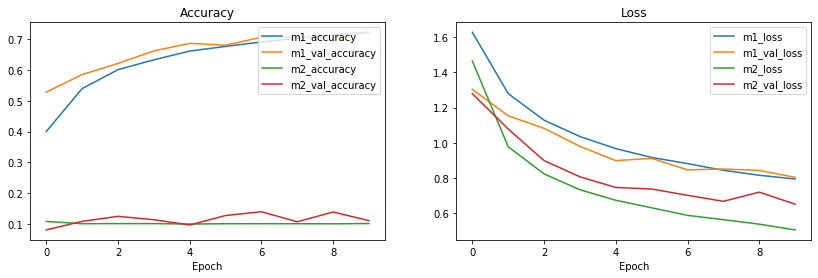

In [74]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
compare_curves(history1, history2, 'accuracy', 'val_accuracy', 'Accuracy')
plt.subplot(1,2,2)
compare_curves(history1, history2, 'loss', 'val_loss', 'Loss')

# within the 10 epoches, the second model performed fairly bad for a lot of reasons.
# However, its loss value went down quickly.

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [25]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [129]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = np.multiply(a_prev_slice, W)
    
    # Sum over s  
    Z = np.sum(s)
    
    # Add bias b to z.
    Z = (Z + b).squeeze()
    
    # print(Z.shape)
    return Z

In [149]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z1 = -6.999089450680221
Z2 = [[[-6.99908945]]]


Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [68]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)))
    
    return X_pad

In [65]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [66]:
a = np.arange(6)
a = a.reshape((2, 3))
np.pad(a, 2, pad_with)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0],
       [0, 0, 3, 4, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [70]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [162]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Get information from "hparameters" 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
          
            for w in range(n_W):       # loop over horizontal axis of the output volume
               
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                    # Find the vertical start and end of the current "slice" 
                    vert_start = h * stride
                    vert_end = vert_start + f

                    # Find the horizontal start and end of the current "slice"
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
 
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad[vert_start : vert_end, horiz_start : horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    # assert(a_slice_prev.shape == weights.shape)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [163]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [174]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start : vert_end, horiz_start : horiz_end, c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [176]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.